# DoE | Análise de Resultados de Experimentos Fatoriais com Python

Nesta atividade, vamos analisar resultados de experimentos fatoriais. Iniciaremos por uma análise mais simples e manuale e avançaremos com o uso da ANOVA.

Vamos utilizar o dataset adaptado CAKE [cake.csv](https://drive.google.com/file/d/1rKsiVTj82Mtr_Mi_SPXwXFr71d32C3HV/view?usp=drive_link).

In [59]:
# seu código
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t
import seaborn as sns

In [39]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Atividade 0 - Baixe e Importe o Dataset
Importe o arquivo como dataframe do Pandas

In [40]:
# seu código
df = pd.read_csv('cake.csv')
df.head()

,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
2,-1,1,5.250
3,-1,1,4.700
4,1,-1,3.775


# Atividade 1 (Opcional) - Plote os experimentos presentes na Tabela
Sugestão: utilize a ferramenta `PairGrid` do Seaborn

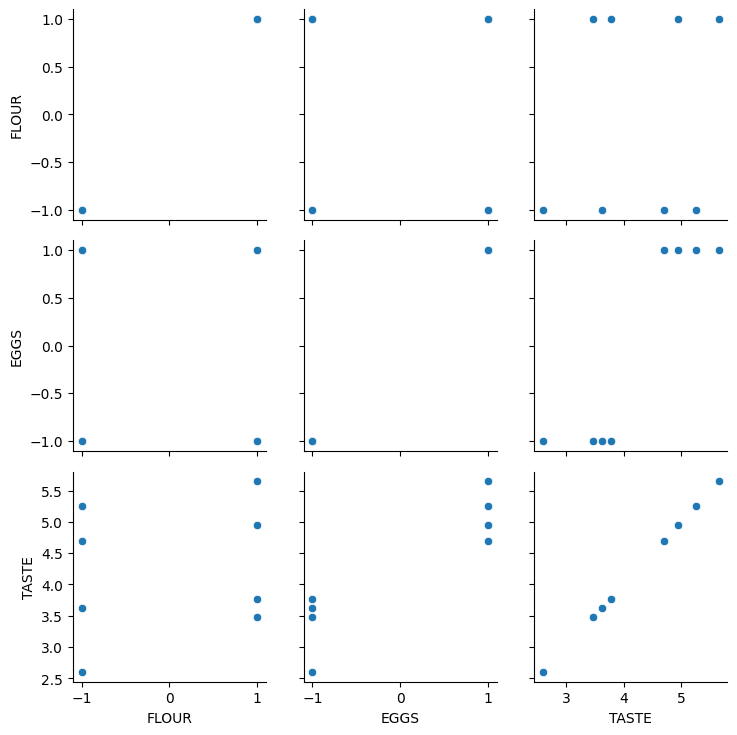

In [41]:
# seu código
g = sns.PairGrid(df)
g.map(sns.scatterplot)

# Atividade 2 - Divida o dataframe e calcule os efeitos do primeiro fator

In [42]:
# FLOUR A
flour_a = df[df.FLOUR==1]['TASTE'].mean()

# FLOUR B
flour_b = df[df.FLOUR==-1]['TASTE'].mean()

In [43]:
efeito_flour = abs(flour_a-flour_b)
print(f'{color.YELLOW}Efeito do FLOUR: {color.END}{color.PURPLE}{efeito_flour:.2f}{color.END}')

Efeito do FLOUR: 0.42


# Atividade 2 - Divida o dataframe e calcule os efeitos do segundo fator

In [44]:
# EGGS A
eggs_a = df[df.EGGS==1]['TASTE'].mean()

# EGGS B
eggs_b = df[df.EGGS==-1]['TASTE'].mean()

In [45]:
# seu código
efeito_eggs = abs(eggs_a-eggs_b)

print(f'{color.YELLOW}Efeito do EGGS:  {color.END}{color.PURPLE}{efeito_eggs:.2f}{color.END}')


Efeito do EGGS:  1.77


# Atividade 3 - Calcule o Efeito combinado
Dica: Esse efeito é obtido a partir das Diagonais

In [46]:
# seu código
flour_eggs_AA = df[(df.EGGS==1)&(df.FLOUR==1)]['TASTE'].mean()
flour_eggs_BB = df[(df.EGGS==-1)&(df.FLOUR==-1)]['TASTE'].mean()
flour_eggs_asc = (flour_eggs_AA + flour_eggs_BB)/2

print(f'{color.YELLOW}Efeito Combinado Diagonal Ascendente:  {color.END}{color.PURPLE}{flour_eggs_asc:.2f}{color.END}')


Efeito Combinado Diagonal Ascendente:  4.21


In [47]:
# seu código
flour_eggs_AA = df[(df.EGGS==1)&(df.FLOUR==-1)]['TASTE'].mean()
flour_eggs_BB = df[(df.EGGS==-1)&(df.FLOUR==1)]['TASTE'].mean()
flour_eggs_desc = (flour_eggs_AA + flour_eggs_BB)/2

print(f'{color.YELLOW}Efeito Combinado Diagonal Descendente:  {color.END}{color.PURPLE}{flour_eggs_desc:.2f}{color.END}')


Efeito Combinado Diagonal Descendente:  4.30


In [48]:
# seu código
efeito_combinado = abs(flour_eggs_desc - flour_eggs_asc)

print(f'{color.YELLOW}Efeito Combinado:  {color.END}{color.PURPLE}{efeito_combinado:.2f}{color.END}')


Efeito Combinado:  0.09


# Atividade 4 - Crie um Modelo de Efeitos Fixos e faça a Análise Estatística

**Análise Estatística do Modelo de Efeitos Fixos (Fixed Effects Model)**

O modelo de efeitos fixos assume que os níveis de cada fator são fixos e pré-determinados. Isso significa que o objetivo do experimento é avaliar o efeito dos diferentes níveis dos fatores, em vez de fazer inferências sobre uma população mais ampla.

A análise estatística do modelo de efeitos fixos envolve a construção de um modelo matemático que relaciona os níveis dos fatores com as variáveis de resposta. Normalmente, utiliza-se a regressão linear para estabelecer essa relação.

Atividade 4.1: Crie o Modelo\
Sugestão: utilize o OLS (Ordinary Least Squares / Mínimos Quadrados Ordinários)

In [49]:
df.columns

Index(['FLOUR', 'EGGS', 'TASTE'], dtype='object')

In [53]:
# seu código
funcao = 'TASTE ~ FLOUR + EGGS + FLOUR*EGGS'

modelo = ols(funcao,df).fit()

In [54]:
modelo.summary()

c:\Users\leolk\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TASTE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     9.139
Date:                Tue, 10 Oct 2023   Prob (F-statistic):             0.0291
Time:                        00:35:16   Log-Likelihood:                -2.8977
No. Observations:                   8   AIC:                             13.80
Df Residuals:                       4   BIC:                             14.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2531      0.174     24.472      0.000       3.771       4.736
FLOUR          0.2094      0.174      1.205      0.295      -0.273       0.692
EGGS           0.8844      0.174      5.089      0.007       0.402       1.367
FLOUR:EGGS    -0.0469      0.174     -0.270      0.801      -0.529       0.436
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   3.087
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                0.706
Skew:                           0.000   Prob(JB):                        0.703
Kurtosis:                       1.545   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Atividade 4.2 - Faça a Análise Estatística do Modelo Utilizando ANOVA

In [56]:
# seu código
anova = sm.stats.anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
FLOUR,1.0,0.350703,0.350703,1.451342,0.294716
EGGS,1.0,6.256953,6.256953,25.893631,0.007038
FLOUR:EGGS,1.0,0.017578,0.017578,0.072745,0.800724
Residual,4.0,0.966562,0.241641,NaN,NaN


In [58]:
print(f'{color.YELLOW}Conforme esperado o {color.END}{color.PURPLE}EGGS{color.END}{color.YELLOW} possui um efeito superior entre os outros testes{color.END}')


Conforme esperado o EGGS possui um efeito superior entre os outros testes


Atividade 4.3 - Faça o Teste T de Student e verifique quais Fatores tiveram efeitos estatisticamente relevantes

Instrução: considere um nível de confiança esperado como 95%


Sugestão: utilize a função `ppf` do `scipy`.

A função `ppf` calcula a **função de distribuição cumulativa inversa** e leva no mínimo 2 argumentos: ppf(q,df).
> Obs: Os outros argumentos são: loc (média) e escala (desvio padrão) - ambos opcionais (quando não declarados, o padrão é 0 e 1, respectivamente).

Por definição, um resultado de x para um determinado valor q e df significa P{T <= x} = q, ou seja, há probabilidade q de obter resultados menores ou iguais a x de uma distribuição T com o local e a escala fornecidos.


Considerando um nível de confiança de 95%, você deseja que 5% da probabilidade esteja nas extremidades da distribuição. Isso geralmente é feito simetricamente para que 2,5% esteja em cada cauda, portanto, você usaria valores q de 0,025 e 0,975 para os pontos de corte inferior e superior, respectivamente.

In [67]:
# seu código
nivel_confianca = 0.95
q = (1+nivel_confianca)/2

teste_t = t.pdf(q,4)
teste_t

0.22005496381670064

In [79]:
testee = pd.DataFrame(modelo.tvalues)
print(testee[testee[0].abs()>teste_t].index)

Index(['Intercept', 'FLOUR', 'EGGS', 'FLOUR:EGGS'], dtype='object')
